In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import statsmodels as sm
import plotnine as p9
import seaborn as sns
df = pd.read_csv('churn_clean.csv',dtype={'locationid':np.int64})
df.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [2]:
df = df.drop(columns=['City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Marital', 'Churn', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Phone', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling', 'PaymentMethod', 'Tenure', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])


In [3]:
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
Children              0
Age                   0
Income                0
Gender                0
Outage_sec_perweek    0
Port_modem            0
Tablet                0
InternetService       0
Multiple              0
StreamingTV           0
StreamingMovies       0
MonthlyCharge         0
Bandwidth_GB_Year     0
dtype: int64

In [4]:
df.describe()

,CaseOrder,Children,Age,Income,Outage_sec_perweek,MonthlyCharge,Bandwidth_GB_Year
count,10000.00000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.0877,53.078400,39806.926771,10.001848,172.624816,3392.341550
std,2886.89568,2.1472,20.698882,28199.916702,2.976019,42.943094,2185.294852
min,1.00000,0.0000,18.000000,348.670000,0.099747,79.978860,155.506715
25%,2500.75000,0.0000,35.000000,19224.717500,8.018214,139.979239,1236.470827
50%,5000.50000,1.0000,53.000000,33170.605000,10.018560,167.484700,3279.536903
75%,7500.25000,3.0000,71.000000,53246.170000,11.969485,200.734725,5586.141370
max,10000.00000,10.0000,89.000000,258900.700000,21.207230,290.160419,7158.981530


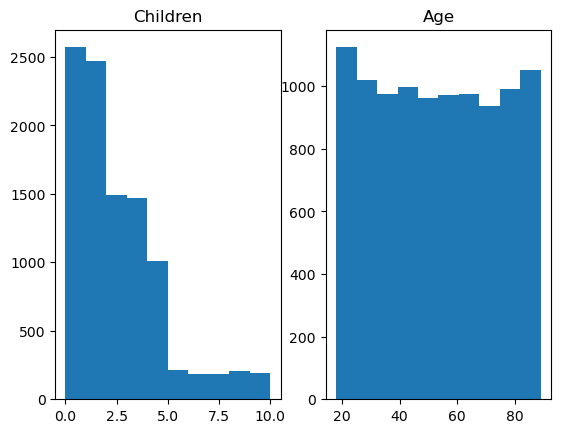

In [5]:
figure, axis = plt.subplots(1,2)
axis[0].hist(df['Children'])
axis[0].set_title("Children")
axis[1].hist(df['Age'])
axis[1].set_title('Age')
plt.show()

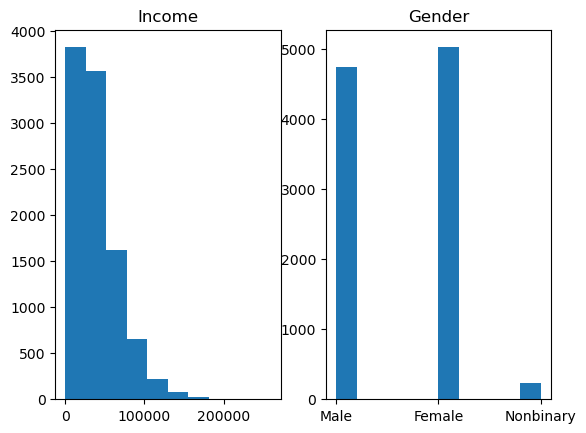

In [6]:
figure, axis = plt.subplots(1,2)
axis[0].hist(df['Income'])
axis[0].set_title("Income")
axis[1].hist(df['Gender'])
axis[1].set_title('Gender')
plt.show()

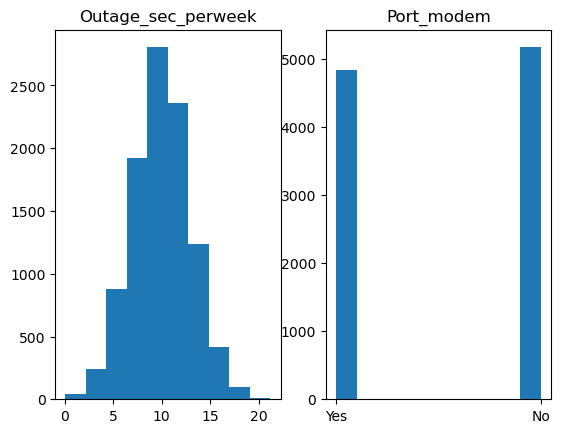

In [7]:
figure, axis = plt.subplots(1,2)
axis[0].hist(df['Outage_sec_perweek'])
axis[0].set_title("Outage_sec_perweek")
axis[1].hist(df['Port_modem'])
axis[1].set_title('Port_modem')
plt.show()

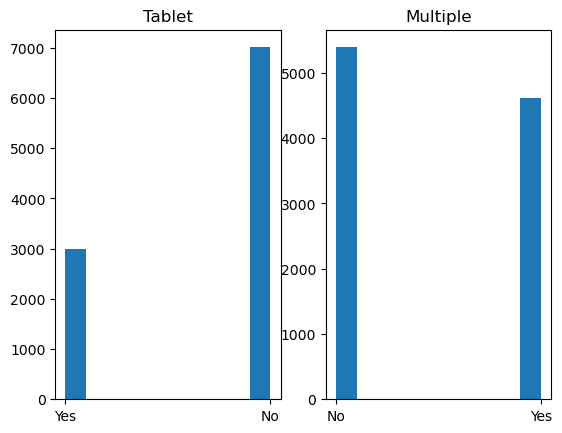

In [8]:
figure, axis = plt.subplots(1,2)
axis[0].hist(df['Tablet'])
axis[0].set_title("Tablet")
axis[1].hist(df['Multiple'])
axis[1].set_title('Multiple')
plt.show()

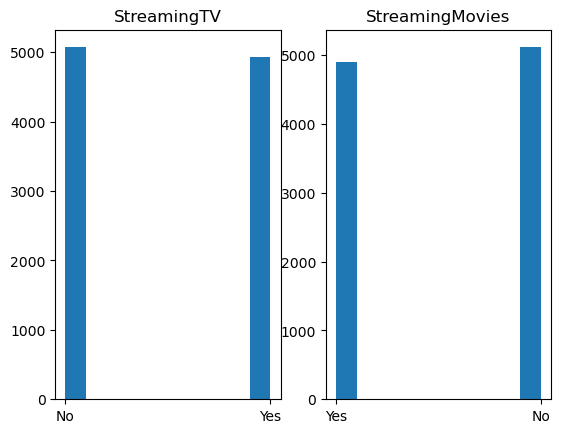

In [9]:
figure, axis = plt.subplots(1,2)
axis[0].hist(df['StreamingTV'])
axis[0].set_title("StreamingTV")
axis[1].hist(df['StreamingMovies'])
axis[1].set_title('StreamingMovies')
plt.show()

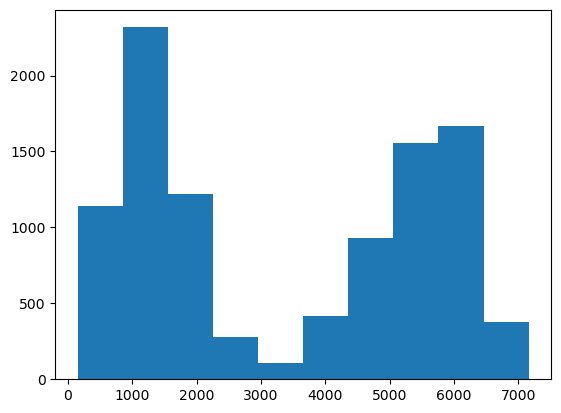

In [10]:
plt.hist(df['Bandwidth_GB_Year'])
plt.show()

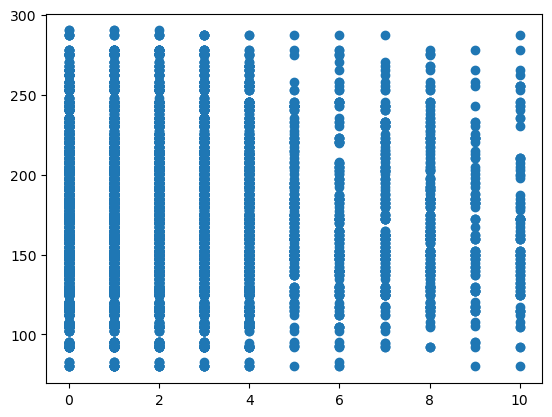

In [11]:
plt.scatter(df.Children, df.MonthlyCharge)

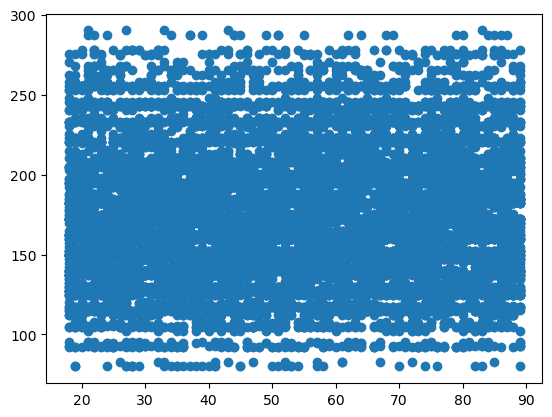

In [12]:
plt.scatter(df.Age, df.MonthlyCharge)

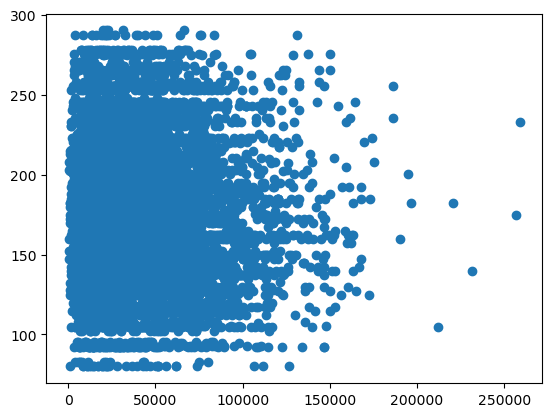

In [13]:
plt.scatter(df.Income, df.MonthlyCharge)

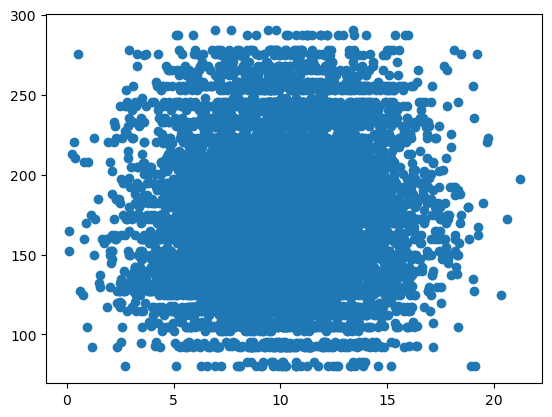

In [14]:
plt.scatter(df.Outage_sec_perweek, df.MonthlyCharge)

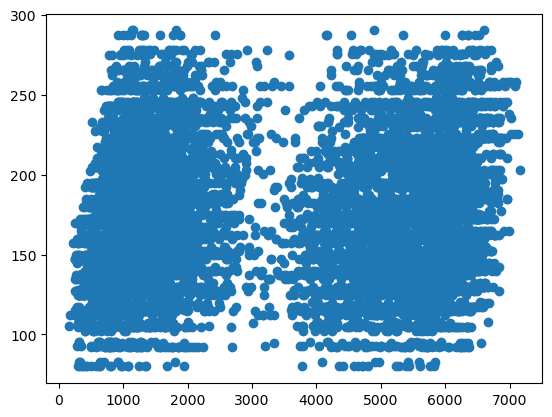

In [15]:
plt.scatter(df.Bandwidth_GB_Year, df.MonthlyCharge)

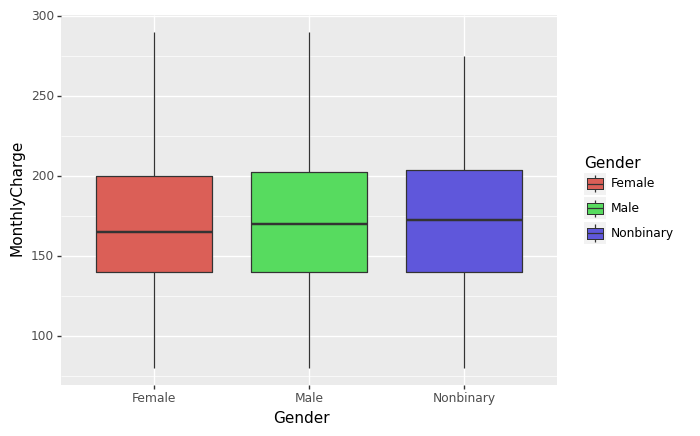

<ggplot: (96863438876)>

In [16]:
p9.ggplot(df) + p9.aes(x='Gender', y = 'MonthlyCharge', fill = 'Gender') + p9.geom_boxplot()

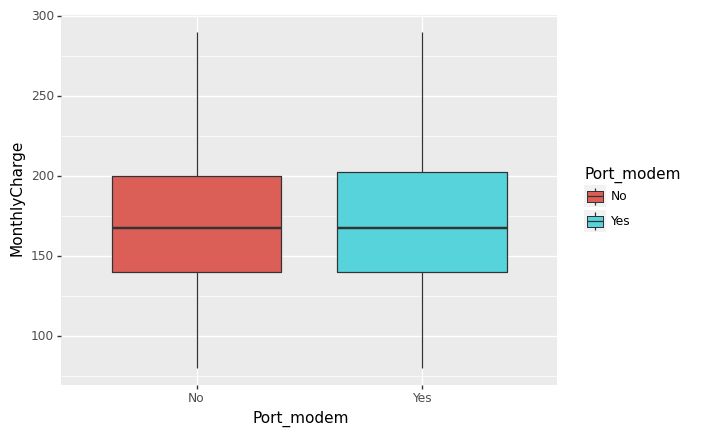

<ggplot: (96862593055)>

In [17]:
p9.ggplot(df) + p9.aes(x='Port_modem', y = 'MonthlyCharge', fill = 'Port_modem') + p9.geom_boxplot()

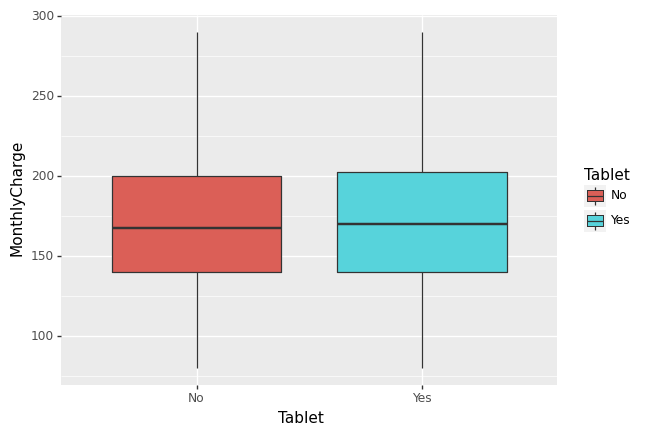

<ggplot: (96863312764)>

In [18]:
p9.ggplot(df) + p9.aes(x='Tablet', y = 'MonthlyCharge', fill = 'Tablet') + p9.geom_boxplot()

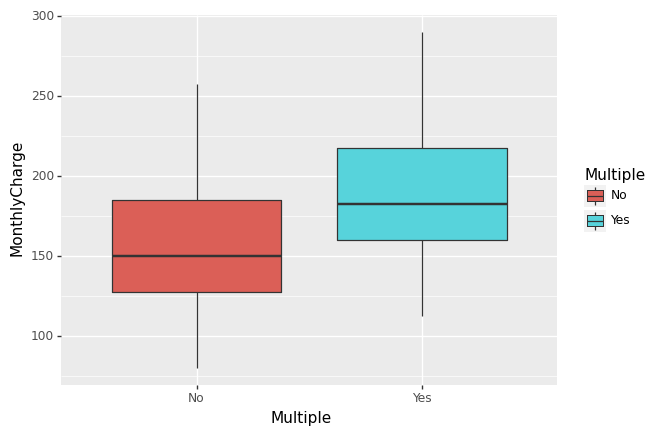

<ggplot: (96863426726)>

In [19]:
p9.ggplot(df) + p9.aes(x='Multiple', y = 'MonthlyCharge', fill = 'Multiple') + p9.geom_boxplot()

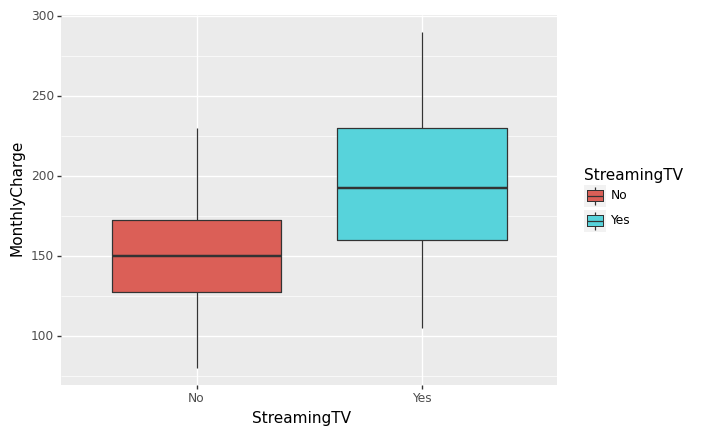

<ggplot: (96863813611)>

In [20]:
p9.ggplot(df) + p9.aes(x='StreamingTV', y = 'MonthlyCharge', fill = 'StreamingTV') + p9.geom_boxplot()

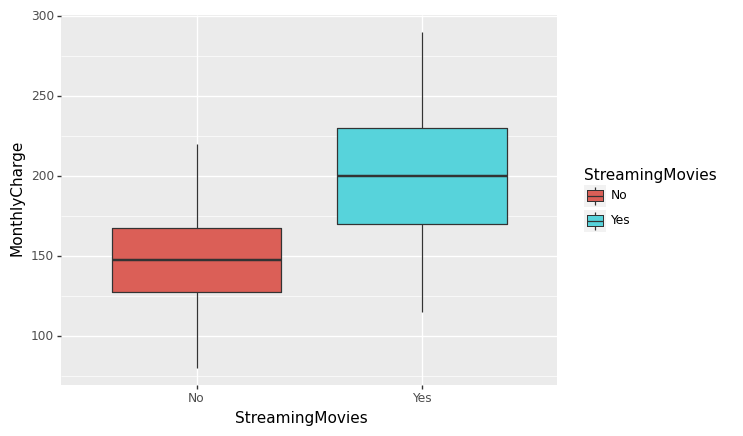

<ggplot: (96863876985)>

In [21]:
p9.ggplot(df) + p9.aes(x='StreamingMovies', y = 'MonthlyCharge', fill = 'StreamingMovies') + p9.geom_boxplot()

In [22]:
df.to_csv(r'C:\Users\jorda\OneDrive\Documents\WGU Stuff\D208\JTompkins_D208PA1.csv')

In [23]:
df['InternetService'].unique()

array(['Fiber Optic', 'DSL', 'None'], dtype=object)

In [24]:
df = pd.get_dummies(df, columns = ['Gender', 'Port_modem', 'Tablet', 'Multiple', 'StreamingTV', 'StreamingMovies'], drop_first = True)
df['InternetService'] = df['InternetService'].map({'DSL': 0, 'None': 0, 'Fiber Optic': 1})

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['Gender_Male', 'Gender_Nonbinary', 'InternetService', 'Bandwidth_GB_Year', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Tablet_Yes', 'Port_modem_Yes', 'Multiple_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes']]

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

                feature       VIF
0           Gender_Male  1.889265
1      Gender_Nonbinary  1.042261
2       InternetService  1.737237
3     Bandwidth_GB_Year  3.186696
4              Children  1.885111
5                   Age  5.825601
6                Income  2.774752
7    Outage_sec_perweek  7.758292
8            Tablet_Yes  1.409781
9        Port_modem_Yes  1.883775
10         Multiple_Yes  1.805848
11      StreamingTV_Yes  1.930162
12  StreamingMovies_Yes  1.921939


In [26]:
from statsmodels.formula.api import ols
df['intercept'] = 1
df_model = ols('MonthlyCharge ~ intercept + InternetService + Bandwidth_GB_Year + Children + Age + Income + Outage_sec_perweek + Gender_Male + Gender_Nonbinary + Port_modem_Yes + Tablet_Yes + Multiple_Yes + StreamingTV_Yes + StreamingMovies_Yes' , data = df).fit()

In [27]:
print(df_model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     3905.
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:18:40   Log-Likelihood:                -42759.
No. Observations:               10000   AIC:                         8.555e+04
Df Residuals:                    9986   BIC:                         8.565e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              49.2092    

In [28]:
df['intercept'] = 1
df_model = ols('MonthlyCharge ~ intercept + InternetService + Bandwidth_GB_Year + Age + Income + Outage_sec_perweek + Gender_Male + Gender_Nonbinary + Port_modem_Yes + Tablet_Yes + Multiple_Yes + StreamingTV_Yes + StreamingMovies_Yes' , data = df).fit()
print(df_model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     4231.
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:18:41   Log-Likelihood:                -42759.
No. Observations:               10000   AIC:                         8.554e+04
Df Residuals:                    9987   BIC:                         8.564e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              49.2186    

In [29]:
df['intercept'] = 1
df_model = ols('MonthlyCharge ~ intercept + InternetService + Bandwidth_GB_Year + Income + Outage_sec_perweek + Gender_Male + Gender_Nonbinary + Port_modem_Yes + Tablet_Yes + Multiple_Yes + StreamingTV_Yes + StreamingMovies_Yes' , data = df).fit()
print(df_model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     4615.
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:18:41   Log-Likelihood:                -42760.
No. Observations:               10000   AIC:                         8.554e+04
Df Residuals:                    9988   BIC:                         8.563e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              49.5812    

In [30]:
df['intercept'] = 1
df_model = ols('MonthlyCharge ~ intercept + InternetService + Bandwidth_GB_Year + Outage_sec_perweek + Gender_Male + Gender_Nonbinary + Port_modem_Yes + Tablet_Yes + Multiple_Yes + StreamingTV_Yes + StreamingMovies_Yes' , data = df).fit()
print(df_model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     5076.
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:18:41   Log-Likelihood:                -42761.
No. Observations:               10000   AIC:                         8.554e+04
Df Residuals:                    9989   BIC:                         8.562e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              49.7317    

In [31]:
df['intercept'] = 1
df_model = ols('MonthlyCharge ~ intercept + InternetService + Bandwidth_GB_Year + Gender_Male + Gender_Nonbinary + Port_modem_Yes + Tablet_Yes + Multiple_Yes + StreamingTV_Yes + StreamingMovies_Yes' , data = df).fit()
print(df_model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     5641.
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:18:41   Log-Likelihood:                -42761.
No. Observations:               10000   AIC:                         8.554e+04
Df Residuals:                    9990   BIC:                         8.561e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              49.6742    

In [32]:
df['intercept'] = 1
df_model = ols('MonthlyCharge ~ intercept + InternetService + Bandwidth_GB_Year + Gender_Nonbinary + Port_modem_Yes + Tablet_Yes + Multiple_Yes + StreamingTV_Yes + StreamingMovies_Yes' , data = df).fit()
print(df_model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     6346.
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:18:41   Log-Likelihood:                -42761.
No. Observations:               10000   AIC:                         8.554e+04
Df Residuals:                    9991   BIC:                         8.561e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              49.6284    

In [33]:
df['intercept'] = 1
df_model = ols('MonthlyCharge ~ intercept + InternetService + Bandwidth_GB_Year + Port_modem_Yes + Tablet_Yes + Multiple_Yes + StreamingTV_Yes + StreamingMovies_Yes' , data = df).fit()
print(df_model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     7253.
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:18:41   Log-Likelihood:                -42762.
No. Observations:               10000   AIC:                         8.554e+04
Df Residuals:                    9992   BIC:                         8.560e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              49.6421    

In [34]:
df['intercept'] = 1
df_model = ols('MonthlyCharge ~ intercept + InternetService + Bandwidth_GB_Year + Tablet_Yes + Multiple_Yes + StreamingTV_Yes + StreamingMovies_Yes' , data = df).fit()
print(df_model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     8462.
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:18:41   Log-Likelihood:                -42762.
No. Observations:               10000   AIC:                         8.554e+04
Df Residuals:                    9993   BIC:                         8.559e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              49.5780    

In [35]:
df['intercept'] = 1
df_model = ols('MonthlyCharge ~ intercept + InternetService + Bandwidth_GB_Year + Multiple_Yes + StreamingTV_Yes + StreamingMovies_Yes' , data = df).fit()
print(df_model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                 1.015e+04
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:18:41   Log-Likelihood:                -42763.
No. Observations:               10000   AIC:                         8.554e+04
Df Residuals:                    9994   BIC:                         8.558e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              49.5065    

In [36]:
reduced_model = ols('MonthlyCharge ~ InternetService + Bandwidth_GB_Year + Multiple_Yes + StreamingTV_Yes + StreamingMovies_Yes', data = df).fit()
print(reduced_model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                 1.015e+04
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:18:41   Log-Likelihood:                -42763.
No. Observations:               10000   AIC:                         8.554e+04
Df Residuals:                    9994   BIC:                         8.558e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              99.0130    

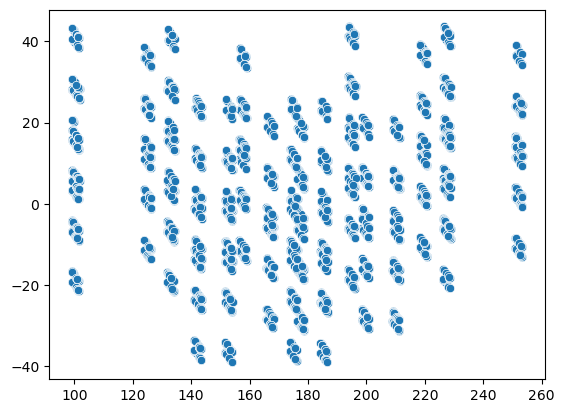

In [37]:
residuals = df['MonthlyCharge'] - reduced_model.predict(df[['intercept', 'InternetService', 'Bandwidth_GB_Year', "Multiple_Yes", 'StreamingTV_Yes', "StreamingMovies_Yes"]])
sns.scatterplot(x=reduced_model.predict(df[['intercept', 'InternetService', 'Bandwidth_GB_Year', "Multiple_Yes", 'StreamingTV_Yes', "StreamingMovies_Yes"]]), y = residuals)
plt.show()

In [38]:
initial_std_error = np.sqrt(df_model.scale)
print(initial_std_error)

resid_std_error = np.sqrt(reduced_model.scale)
print(resid_std_error)

17.420345873040876
17.420345873040876


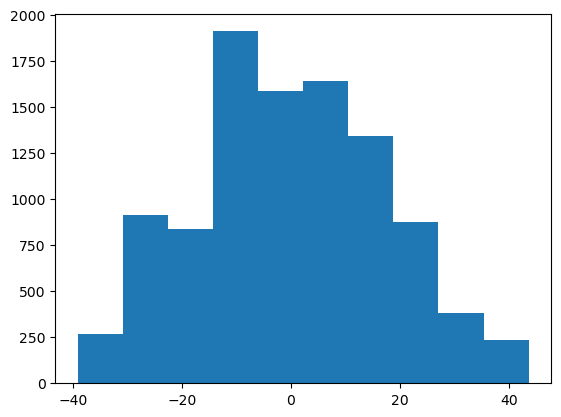

In [39]:
plt.hist(residuals)
plt.show()